In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [29]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [30]:
models = df_events[["person","model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]

In [31]:
df = df_events.loc[(df_events["country"].isnull() == False) & (df_events["country"] != "Unknown"),:]
df = df[['person','country','region']]

df = df.drop_duplicates(subset='person')


#df2 = df[["person","region","country"]]

models = models.merge(df, on='person')

In [33]:
colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

models = models.loc[models['in_color'] != 'Basura']
colores = models['in_color'].value_counts().sort_index()
colores

Azul       21
Blanco    210
Dorado    239
Negro     436
Otros      13
Plata      84
Rosa       51
Name: in_color, dtype: int64

In [25]:
brazil = models.loc[models["country"] == "Brazil"]
brazil = brazil.loc[brazil["region"] != "Unknown"]

top_5_regiones = brazil["region"].value_counts().head()

In [17]:
sao_pablo = brazil.loc[(brazil["region"] == "Sao Paulo")]
sao_pablo = sao_pablo["in_color"].value_counts().sort_index()
sao_pablo

Azul       5
Blanco    62
Dorado    71
Negro     93
Otros      3
Plata     40
Rosa      14
Name: in_color, dtype: int64

In [18]:
minas_gerais  = brazil.loc[brazil["region"] == "Minas Gerais"]

"""colores_f = pd.Series( [0,0,0,0,0,0,0],
    index = ["azul","Blanco","Dorado","Negro","Otros","Plata","Rosa")"""

        

minas_gerais = minas_gerais["in_color"].value_counts().sort_index()
minas_gerais

Azul       4
Blanco     9
Dorado    19
Negro     58
Otros      1
Plata      8
Rosa       5
Name: in_color, dtype: int64

In [36]:
rio  = brazil.loc[brazil["region"] == "Rio de Janeiro"]

colores_f = colores_f = pd.Series( [0],
    index = ["Otros"])
rio = rio["in_color"].value_counts()
rio = rio.append(colores_f) 

rio = rio.sort_index()
rio

Azul       1
Blanco     9
Dorado    24
Negro     50
Otros      0
Plata      4
Rosa       5
dtype: int64

In [20]:
maranhao  = brazil.loc[brazil["region"] == "Maranhao"]
maranhao = maranhao["in_color"].value_counts().sort_index()
maranhao 

Azul       1
Blanco    12
Dorado     6
Negro     15
Otros      2
Plata      2
Rosa       5
Name: in_color, dtype: int64

In [38]:
bahia  = brazil.loc[brazil["region"] == "Bahia"]

bahia = bahia["in_color"].value_counts()

colores_f = colores_f = pd.Series( [0],
    index = ["Azul"])

bahia = bahia.append(colores_f)

bahia = bahia.sort_index()
bahia 

Azul       0
Blanco    20
Dorado    25
Negro     22
Otros      1
Plata      5
Rosa       4
dtype: int64

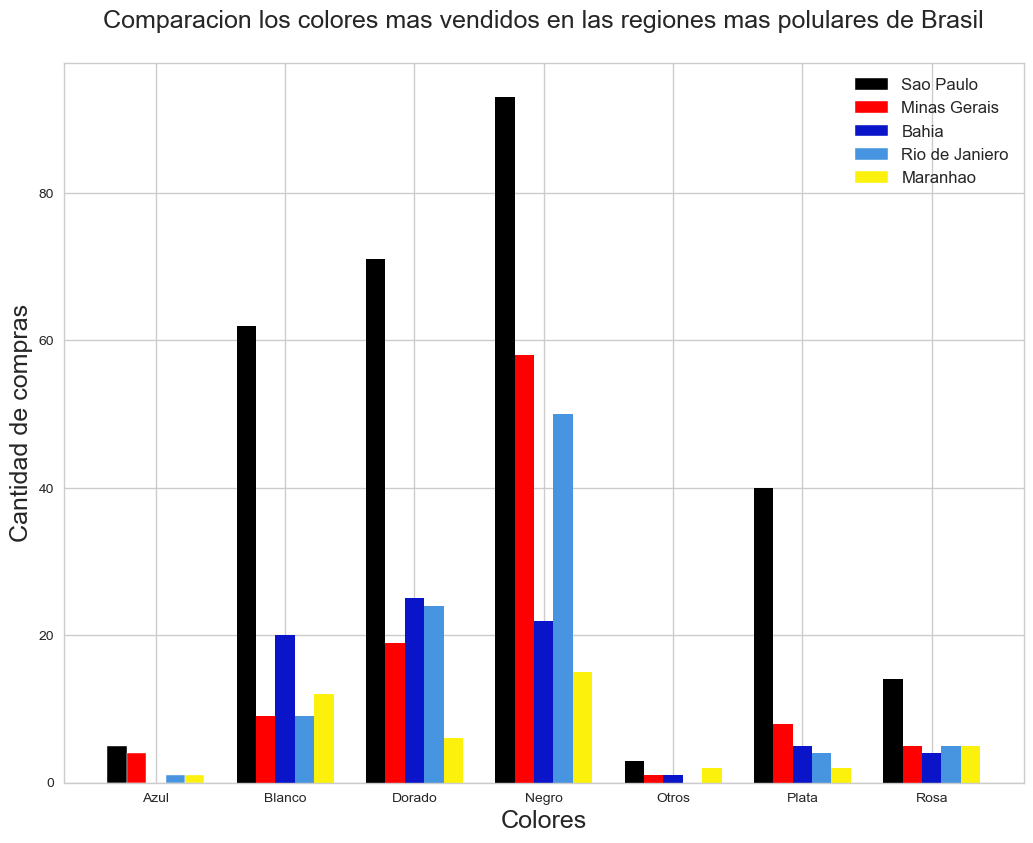

In [40]:
nombres = ["Azul","Blanco","Dorado","Negro","Otros","Plata","Rosa"]

X = np.arange (len(nombres))
Y1 = sao_pablo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio.values
Y5 = maranhao.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Maranhao", width = 0.15, align = "center",edgecolor = "white")


plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Colores",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion los colores mas vendidos en las regiones mas polulares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()